---
# Pilot SRF

This notebook describes the first attempt with the hole-response experiment. The pipeline starts of after [call_lsprep](https://github.com/gjheij/linescanning/blob/main/bin/call_lsprep), which creates an `h5`-file with all relevant dataframes

In [9]:
from linescanning import (
    utils,
    dataset,
    fitting,
    plotting
)
import pandas as pd
import matplotlib.pyplot as plt
import os
opj = os.path.join

## Data loader

In [14]:
deriv = "/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives"
subject = "sub-008"
ribbon = (357,366)

# get h5-file
data_file = opj(deriv, "lsprep", subject, f"{subject}_ses-2_desc-preproc_bold.h5")

# load in
obj_ = dataset.Dataset(
    data_file,
    verbose=True
)

df_onsets = obj_.fetch_onsets()
df_func = obj_.fetch_fmri()

DATASET
Reading from /data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/lsprep/sub-008/sub-008_ses-2_desc-preproc_bold.h5
 Set attribute: df_blinks
 Set attribute: df_func_ica
 Set attribute: df_func_psc
 Set attribute: df_func_raw
 Set attribute: df_onsets
 Could not set attribute 'df_saccades'
 Set attribute: df_space_eye
 Set attribute: df_space_func

DATASET: created
Fetching dataframe from attribute 'df_func_psc'


In [15]:
# average across runs within tasks
df_avg = df_func.groupby(["subject","task","t"]).mean()
df_avg

vox 0      vox 1      vox 2      vox 3      vox 4  \
subject task t                                                                
008     SRFa 0.000    -0.072243  10.757678  -4.229917  -7.617972 -22.183029   
             0.105     4.534716  17.207062  -3.101501  20.129179 -14.890283   
             0.210     8.699162   6.364235   9.320292  20.572077  -3.641459   
             0.315    16.912241   8.118379  -5.824725  28.068029 -13.411397   
             0.420     4.853348 -27.244730   0.504144  12.383107   0.785624   
...                         ...        ...        ...        ...        ...   
        SRFb 335.475  11.934085  22.812483   9.368197   8.480537   6.090597   
             335.580  34.335537  19.658188   9.377261   1.604729 -11.975560   
             335.685  -1.365507   1.843567  -6.528628   7.143321   5.231407   
             335.790  -7.586098  37.883759  -9.351207   8.920491 -17.287945   
             335.895 -10.964752  -8.492004 -14.534513  -5.248347 -10.664060   

                          vox 5      vox 6      vox 7      vox 8      vox 9  \
subject task t                                                                
008     SRFa 0.000     5.848160   6.635553  -1.089747   4.087618  -8.388580   
             0.105    -0.374657  -6.328964 -15.977620   1.733744   3.434466   
             0.210    12.148549   1.464010   6.654897 -21.806717 -14.704132   
             0.315    -9.257034   0.965912   7.172997 -31.941675  16.121496   
             0.420     9.205150  29.222845   8.034081   8.960960  12.764717   
...                         ...        ...        ...        ...        ...   
        SRFb 335.475   3.728210 -16.359381   4.209399 -16.641996 -15.617310   
             335.580  -9.933383  11.272244  13.303386   7.885206  21.269836   
             335.685  -6.475713  20.119829  -1.117620   7.678950  -4.243544   
             335.790   5.141775   7.309380 -23.711168  -6.514526  13.705360   
             335.895  -7.258390   3.662552   9.724220  21.437677  12.109360   

                      ...    vox 710    vox 711    vox 712    vox 713  \
subject task t        ...                                               
008     SRFa 0.000    ...   9.758095 -11.172732 -13.549011   7.263880   
             0.105    ...   0.825869 -12.343432   5.037064   5.750799   
             0.210    ... -11.432281  -7.338768  -2.535578  -9.058243   
             0.315    ...   6.336912   2.777423  32.700176   2.908361   
             0.420    ...  33.631920  -5.622983   3.145503 -14.975212   
...                   ...        ...        ...        ...        ...   
        SRFb 335.475  ...  17.178480   0.998751  -4.553385   2.443965   
             335.580  ...   7.272807 -11.232633 -16.341776  -0.878583   
             335.685  ...   6.353139  -6.751528   2.510478 -10.812474   
             335.790  ...   7.525500  -4.378178  13.441200  -0.310565   
             335.895  ...   1.373672   7.262421 -19.412415 -31.298510   

                        vox 714    vox 715    vox 716    vox 717    vox 718  \
subject task t                                                                
008     SRFa 0.000     6.694199  -4.697871 -20.482168  -3.818176   5.480390   
             0.105     1.182182  14.388466  -9.307846  -3.369878  -5.315920   
             0.210   -12.102542  18.623184 -18.764380  11.067601  29.002943   
             0.315   -10.285205  -1.689875  15.966052  -0.452258  11.513515   
             0.420     9.638871   3.966057  15.339249 -21.442963  12.721400   
...                         ...        ...        ...        ...        ...   
        SRFb 335.475  13.682193  -6.226479  -8.911540  -4.095904 -18.211689   
             335.580 -11.596383  22.187212   4.268394 -20.818460  20.312670   
             335.685   6.250135   5.601690 -22.313517 -28.603043  15.695396   
             335.790 -11.005294   9.625069  11.686131   4.663811  18.222193   
             335.895  -3.044263   5.263903  10.794228  -3.414963   4.689

In [16]:
# select ribbon voxels
df_ribbon = utils.select_from_df(df_avg, expression="ribbon", indices=ribbon)
df_ribbon

vox 357   vox 358   vox 359   vox 360   vox 361  \
subject task t                                                           
008     SRFa 0.000   -0.517993 -2.410431 -1.045695 -1.085574  0.151843   
             0.105   -1.534927  0.468923 -0.625643 -0.785845 -0.102491   
             0.210   -1.280286  0.025495  0.763962 -0.387230 -1.175789   
             0.315   -1.851804 -0.995338 -0.361417  0.388252  0.291979   
             0.420   -1.604396 -0.211342  0.475980 -1.886762 -1.111196   
...                        ...       ...       ...       ...       ...   
        SRFb 335.475  1.696218  2.256210 -0.665288 -2.230520  0.037758   
             335.580 -0.348811 -1.575686 -0.441462  2.185895 -0.537888   
             335.685 -0.723320  2.003443  0.452944 -0.519903  1.117455   
             335.790  0.784411 -0.599007  1.007245  1.424123 -0.724136   
             335.895  0.337725  1.797259  1.031222  0.813983 -0.057378   

                       vox 362   vox 363   vox 364   vox 365  
subject task t                                                
008     SRFa 0.000    1.825974  1.710955  2.332603  0.601791  
             0.105    2.340797  3.088300  1.400279  2.209880  
             0.210   -0.721860  0.719198 -0.370466 -1.523163  
             0.315    0.968931  0.591006 -0.403414 -2.014915  
             0.420   -1.386002  1.297785 -0.655708 -0.562579  
...                        ...       ...       ...       ...  
        SRFb 335.475 -0.538879  1.218623  1.143519  2.383471  
             335.580  0.321256  0.289032  1.635279 -0.530490  
             335.685  1.306338  1.428083  1.302556  1.176219  
             335.790  1.978264  1.641665  1.898277  1.188120  
             335.895 -0.728610  1.238922  0.007228  1.364507  

[6400 rows x 9 columns]

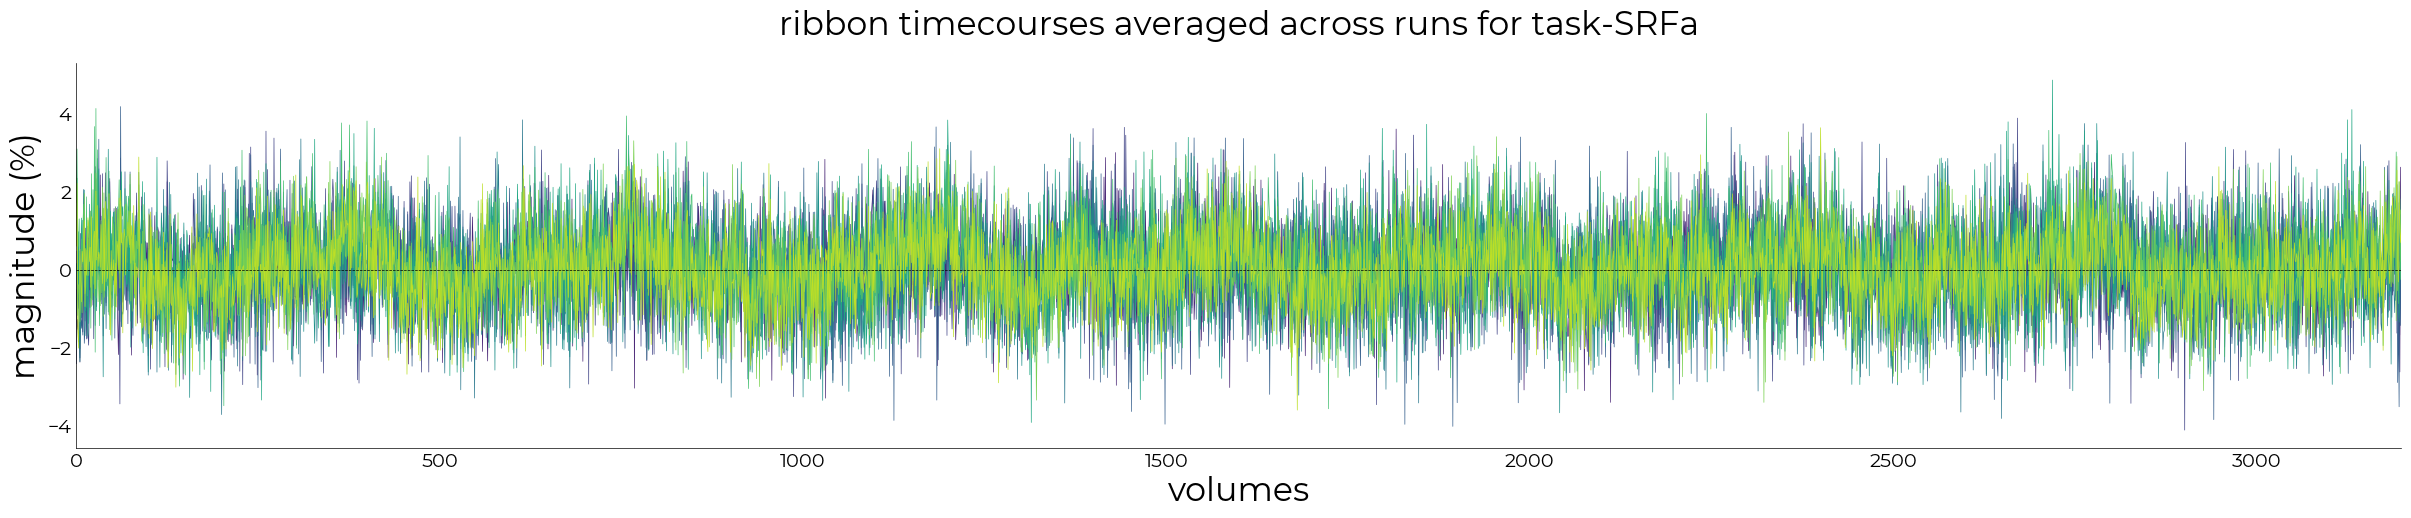

In [17]:
%matplotlib inline
# plot timecourses
task1_data = utils.select_from_df(df_ribbon, expression="task = SRFa")

plotting.LazyPlot(
    list(task1_data.T.to_numpy()),
    x_label="volumes",
    y_label="magnitude (%)",
    font_size=24,
    add_hline=0,
    line_width=0.5,
    title=f"ribbon timecourses averaged across runs for task-SRFa"
)

In [18]:
# switch our task-ID for run-IDs so we can flop everything in nideconv
renamed_func = []
renamed_onsets = []

task_onsets = utils.select_from_df(df_onsets, expression="event_type != response")
for ix,task in enumerate(["SRFa","SRFb"]):
    
    # sort out func
    df = utils.select_from_df(df_ribbon, expression=f"task = {task}").reset_index()
    df["run"] = ix+1
    df = df.drop("task", axis=1)
    renamed_func.append(df)

    # sort out onsets
    df = utils.select_from_df(task_onsets, expression=(f"task = {task}","&","run = 1")).reset_index()
    df["run"] = ix+1
    df = df.drop("task", axis=1)
    renamed_onsets.append(df)

renamed_func = pd.concat(renamed_func).set_index(["subject","run","t"])
renamed_onsets = pd.concat(renamed_onsets).set_index(["subject","run","event_type"])
renamed_onsets

onset
subject run event_type            
008     1   norm         30.436678
            act          39.586607
            norm         47.345181
            norm         54.378172
            norm         61.703572
...                            ...
        2   norm        276.548166
            norm        284.599453
            act         291.748450
            norm        298.965087
            norm        309.406365

[64 rows x 1 columns]

## Fitting

In [30]:
# fit events on averaged data
can_fit = fitting.NideconvFitter(
    renamed_func,
    renamed_onsets,
    basis_sets='canonical_hrf_with_time_derivative',
    # n_regressors=4,
    TR=0.105,
    interval=[-3,25],
    add_intercept=True,
    verbose=True,
    fit=True)

# fit events on averaged data
fou_fit = fitting.NideconvFitter(
    renamed_func,
    renamed_onsets,
    basis_sets='fourier',
    n_regressors=4,
    TR=0.105,
    interval=[-3,25],
    add_intercept=True,
    verbose=True,
    fit=True)


Selected 'canonical_hrf_with_time_derivative'-basis sets
Adding event 'act' to model
Adding event 'norm' to model
Fitting with 'ols' minimization
Done
Selected 'fourier'-basis sets
Adding event 'act' to model
Adding event 'norm' to model
Fitting with 'ols' minimization
Done


In [26]:
# # fit button response on single run data
# response_onsets = utils.select_from_df(df_onsets, expression="event_type = response")
# fit_button = fitting.NideconvFitter(
#     df_func,
#     response_onsets,
#     basis_sets='fourier',
#     n_regressors=9,
#     TR=0.105,
#     interval=[-3,17],
#     add_intercept=True,
#     verbose=True,
#     fit=True)

# fit_button.timecourses_condition()

## Plotting

### Average over ribbon voxels

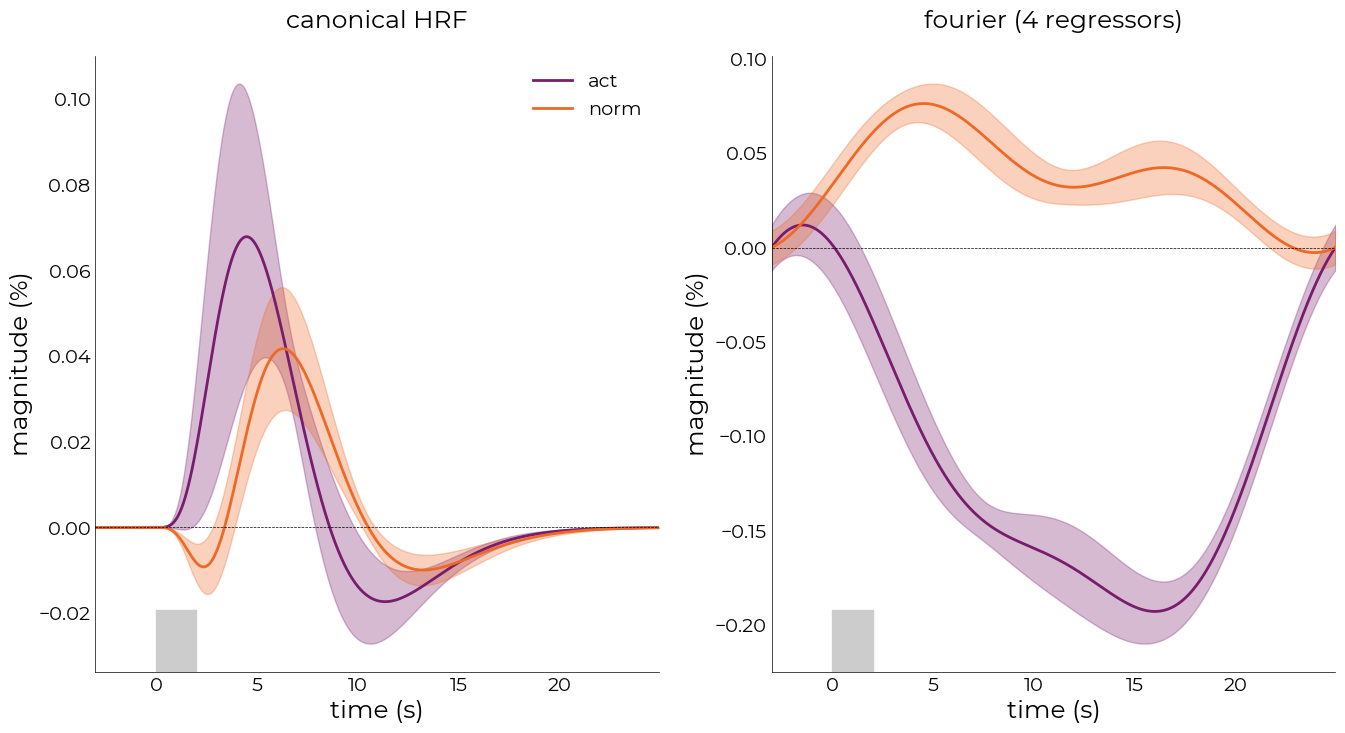

In [37]:
%matplotlib inline
fig,axs = plt.subplots(ncols=2, figsize=(16,8))
can_fit.plot_average_per_event(
    x_label="time (s)",
    y_label="magnitude (%)",
    add_hline='default',
    axs=axs[0],
    title="canonical HRF",
    labels=can_fit.cond,
    line_width=2,
    cmap='inferno')

fou_fit.plot_average_per_event(
    x_label="time (s)",
    y_label="magnitude (%)",
    add_hline='default',
    axs=axs[1],
    title="fourier (4 regressors)",
    line_width=2,
    cmap='inferno')

# plot stimulus onset
for ax in axs:
    ax.axvspan(0,2, ymax=0.1, color="#cccccc")

In [34]:
can_fit.model.get_rsq()

vox 357   vox 358   vox 359   vox 360   vox 361   vox 362  \
subject run                                                               
008     1    0.000200  0.000718  0.002414  0.004208  0.004565  0.008376   
        2    0.001766  0.002219  0.003701  0.000338  0.001186  0.000856   

              vox 363   vox 364   vox 365  
subject run                                
008     1    0.011650  0.015327  0.009390  
        2    0.003527  0.003926  0.001829

In [35]:
fou_fit.model.get_rsq()

vox 357   vox 358   vox 359   vox 360   vox 361   vox 362  \
subject run                                                               
008     1    0.004678  0.002493  0.003614  0.014195  0.011331  0.019040   
        2    0.009373  0.005630  0.007587  0.004574  0.008324  0.007737   

              vox 363   vox 364   vox 365  
subject run                                
008     1    0.026278  0.040672  0.024280  
        2    0.014430  0.008569  0.009537

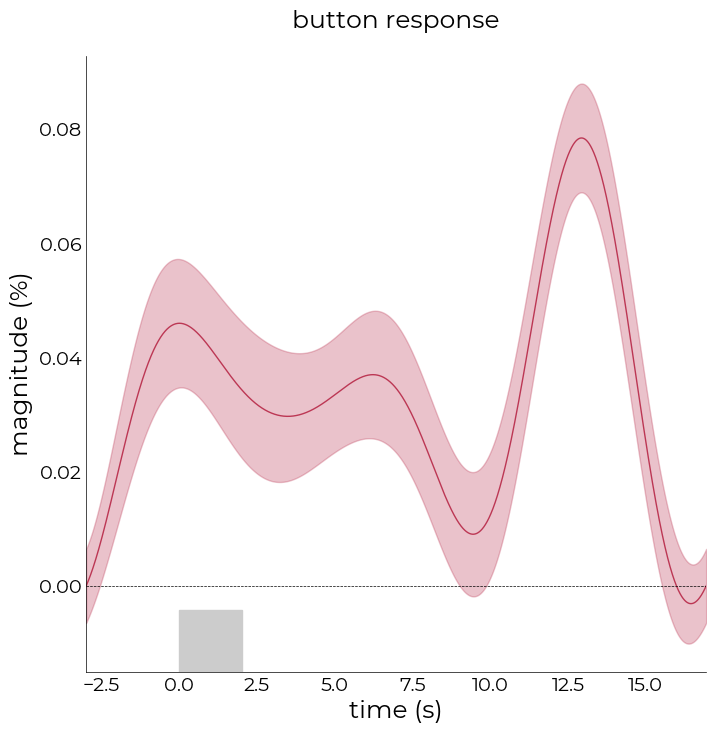

In [170]:
# %matplotlib inline
# fig,axs = plt.subplots(figsize=(8,8))
# fit_button.plot_average_per_event(
#     x_label="time (s)",
#     y_label="magnitude (%)",
#     add_hline='default',
#     axs=axs,
#     title="button response",
#     add_labels=True,
#     fancy=True,
#     fancy_denom=6,
#     inset_ttp=[0.75, 0.8, 0.3],
#     cmap='inferno')

# # plot stimulus onset
# axs.axvspan(0,2, ymax=0.1, color="#cccccc")

### Split events over voxels

In [157]:
df_ribbon.shape

(6400, 6)

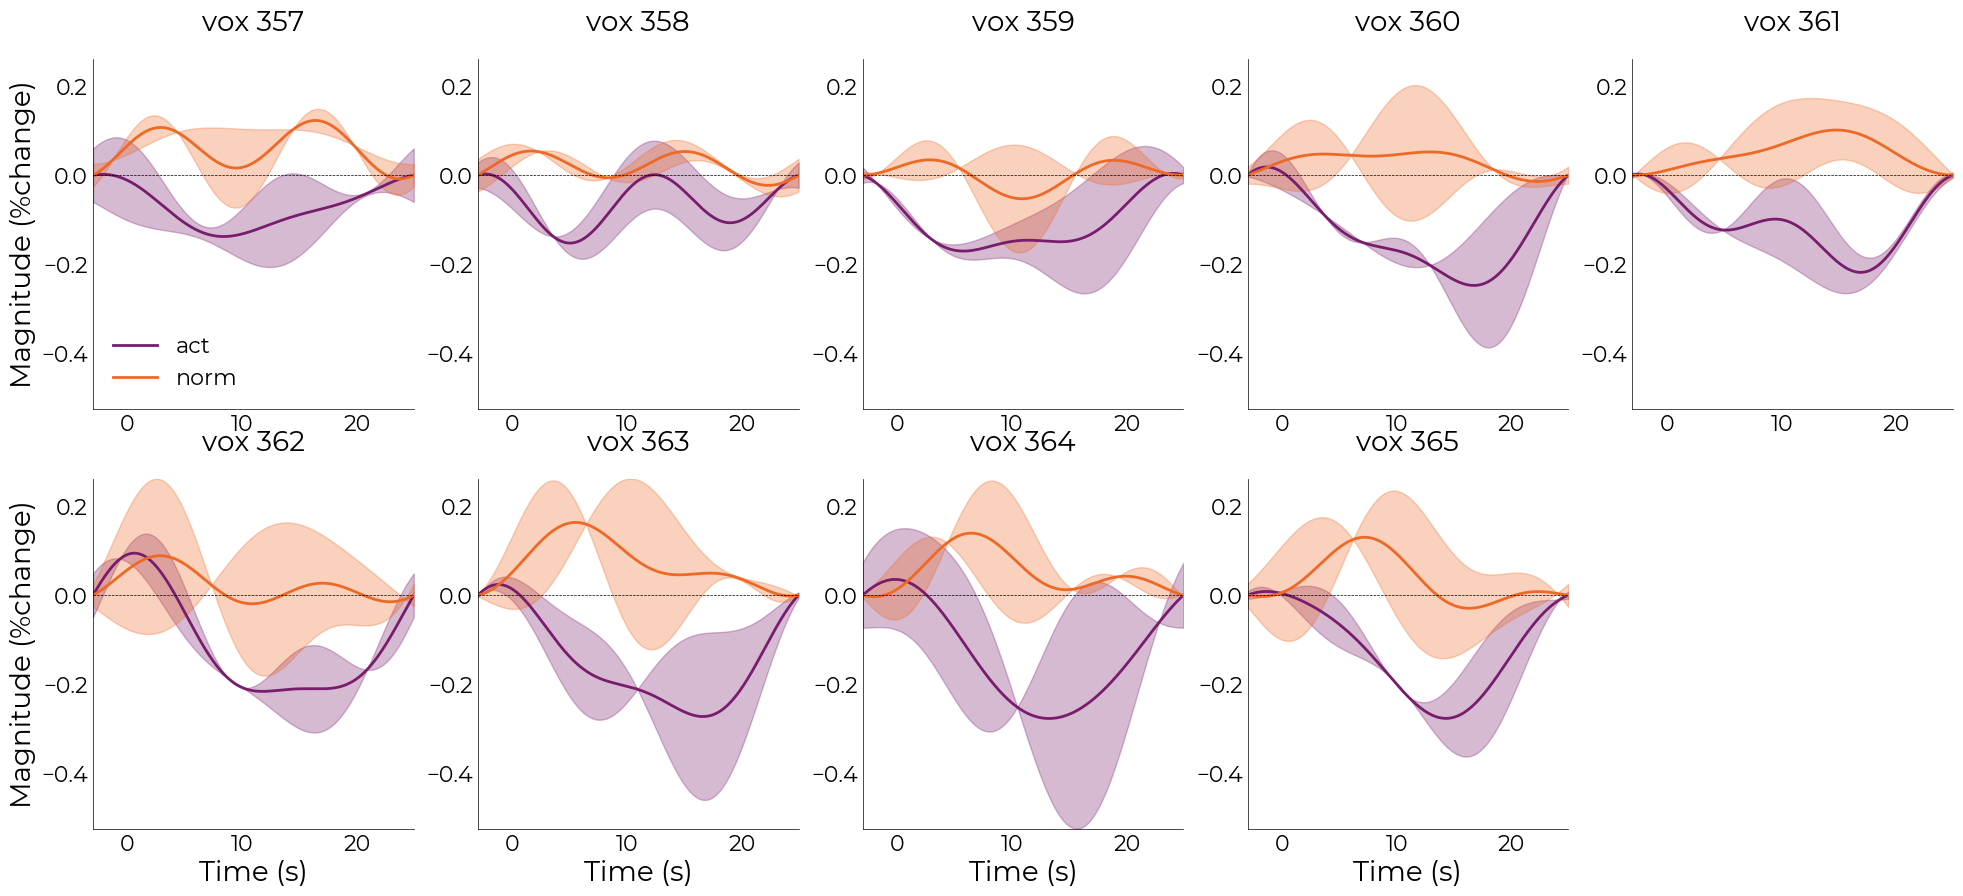

In [39]:
fou_fit.plot_average_per_voxel(
    labels=nd_fit.cond,
    wspace=0.2,
    # n_cols=df_ribbon.shape[-1],
    n_cols=5,
    cmap="inferno",
    line_width=2,
    font_size=20,
    label_size=16,
    sharey=True)
    # save_as=opj(func_dir, "hrf_gamma_voxel.png"))